In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
def mostra_img(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
img = cv2.imread('/content/paisagem01.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(389, 620, 3)

In [4]:
altura, largura = img.shape[:2]
print(altura, largura)

389 620


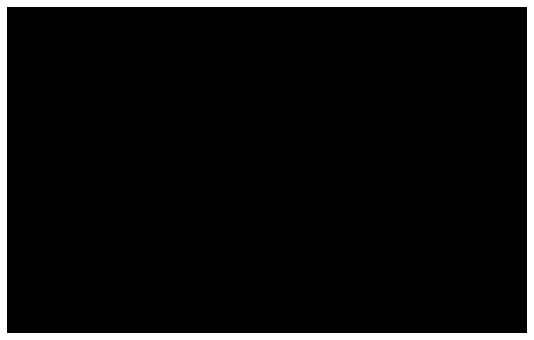

In [5]:
mascara = np.zeros((altura, largura), np.uint8)
mostra_img(mascara)

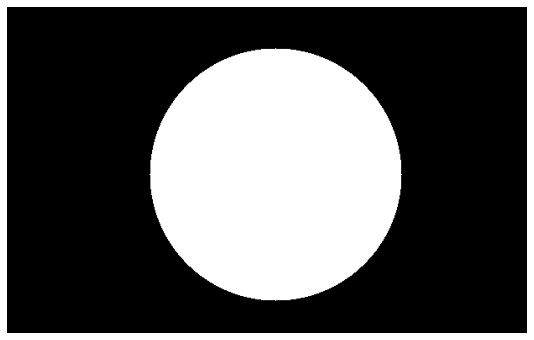

In [6]:
cv2.circle(mascara, (320, 200), 150, 255, -1)
mostra_img(mascara)

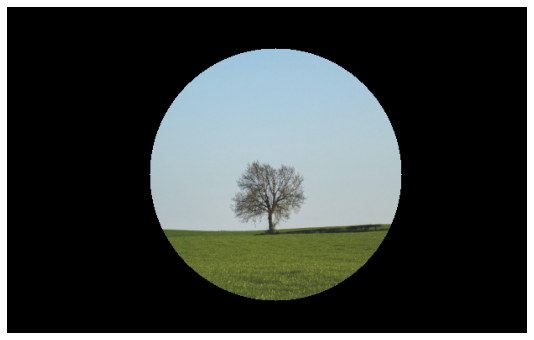

In [7]:
img_final = cv2.bitwise_and(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(img, cv2.COLOR_BGR2RGB), mask=mascara)
mostra_img(img_final)

In [8]:
fundo_branco = 255 * np.ones((altura, largura, 3), np.uint8)

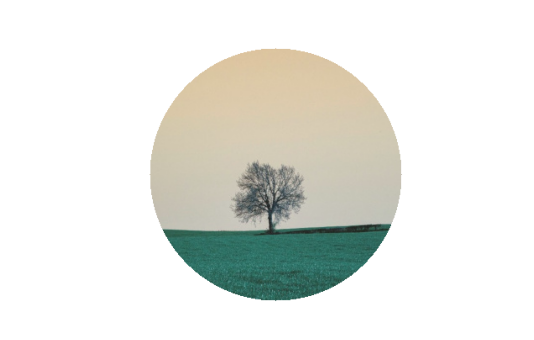

In [9]:
img_final = img.copy()
img_final[mascara==0] = fundo_branco[mascara == 0]
mostra_img(img_final)

In [10]:
fundo = cv2.imread('/content/montanha.jpg')
fundo = cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB)
fundo.shape

(750, 1180, 3)

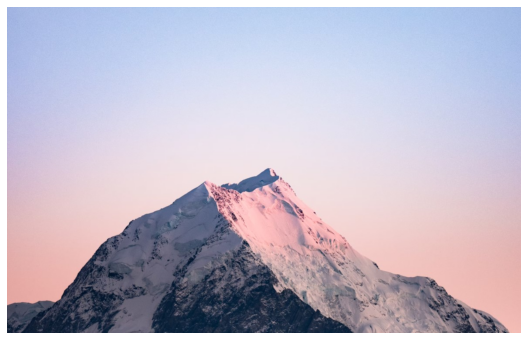

In [11]:
mostra_img(fundo)

In [12]:
fundo = cv2.resize(fundo, (largura, altura))
fundo.shape

(389, 620, 3)

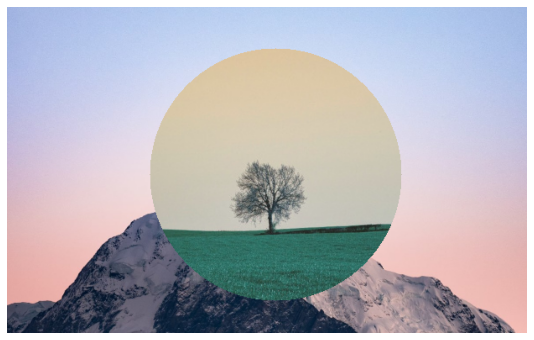

In [13]:
img_final[mascara == 0] = fundo[mascara==0]
mostra_img(img_final)

#Isolar o Objeto

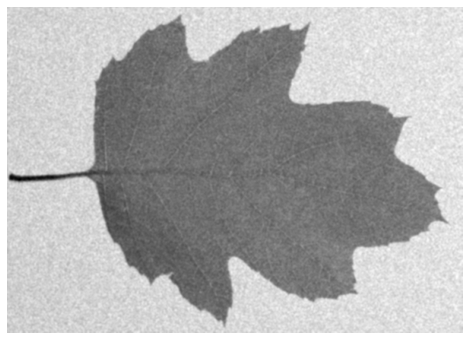

In [15]:
img = cv2.imread('/content/folha_ruido.jpg')
altura, largura = img.shape[:2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
desfoque = cv2.GaussianBlur(gray, (5,5), 0)
mostra_img(desfoque)

139.0


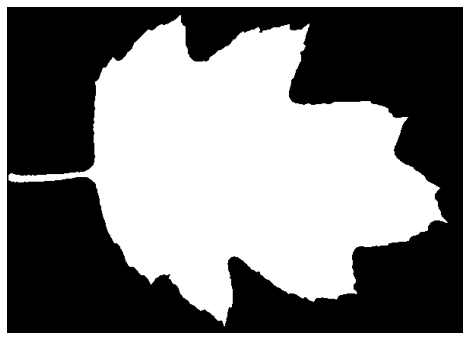

In [16]:
valor, mascara = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(valor)
mostra_img(mascara)

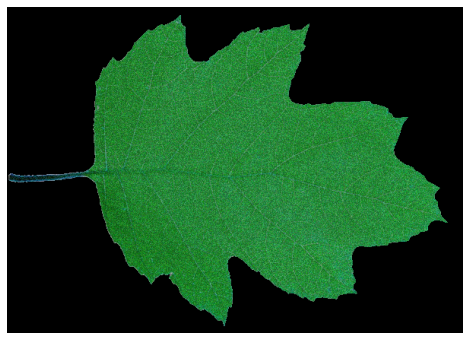

In [17]:
img_final = cv2.bitwise_and(img, img, mask=mascara)
mostra_img(img_final)

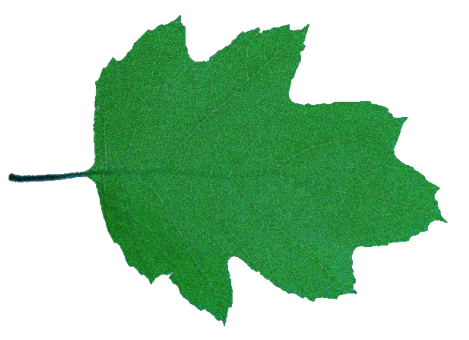

In [18]:
fundo_branco = 255 * np.ones((altura, largura, 3), np.uint8)
img_final = img.copy()
img_final[mascara == 0] = fundo_branco[mascara == 0]
mostra_img(img_final)

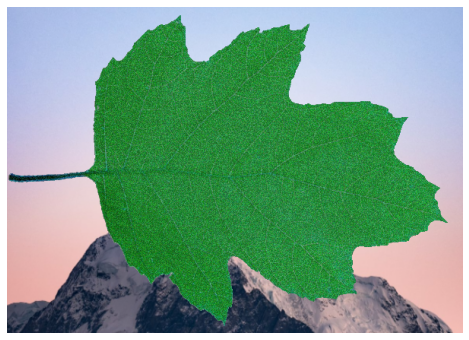

In [19]:
fundo = cv2.resize(fundo, (largura, altura))
img_final[mascara == 0] = fundo[mascara == 0]
mostra_img(img_final)